In [62]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

from libtiff import TIFF

from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

nx,ny=64,64#146

X=np.load('spatial_X.npy')#[:nx,60:60+ny,:]
FA_spatial=np.load('spatial_features.npy')
#RS_spatial = agglo.inverse_transform(FA_spatial)
#RS_spatial=RS_spatial.reshape((nx,ny,128,128))

from sklearn.decomposition import PCA

n_pca=4096
pca = PCA(n_components=n_pca, svd_solver='randomized')
pca_features=pca.fit_transform(FA_spatial)#components_

"""
id_zero=np.abs(X[:,0]).argmin()
print(X[id_zero])
pca_features=pca.fit_transform(np.delete(FA_spatial,id_zero,0))#components_
pca_features=np.insert(pca_features,id_zero,np.zeros(n_pca),0)
"""


'\nid_zero=np.abs(X[:,0]).argmin()\nprint(X[id_zero])\npca_features=pca.fit_transform(np.delete(FA_spatial,id_zero,0))#components_\npca_features=np.insert(pca_features,id_zero,np.zeros(n_pca),0)\n'

In [63]:
print(FA_spatial.shape)
print(X.shape)


(4096, 4096)
(4096, 262144)


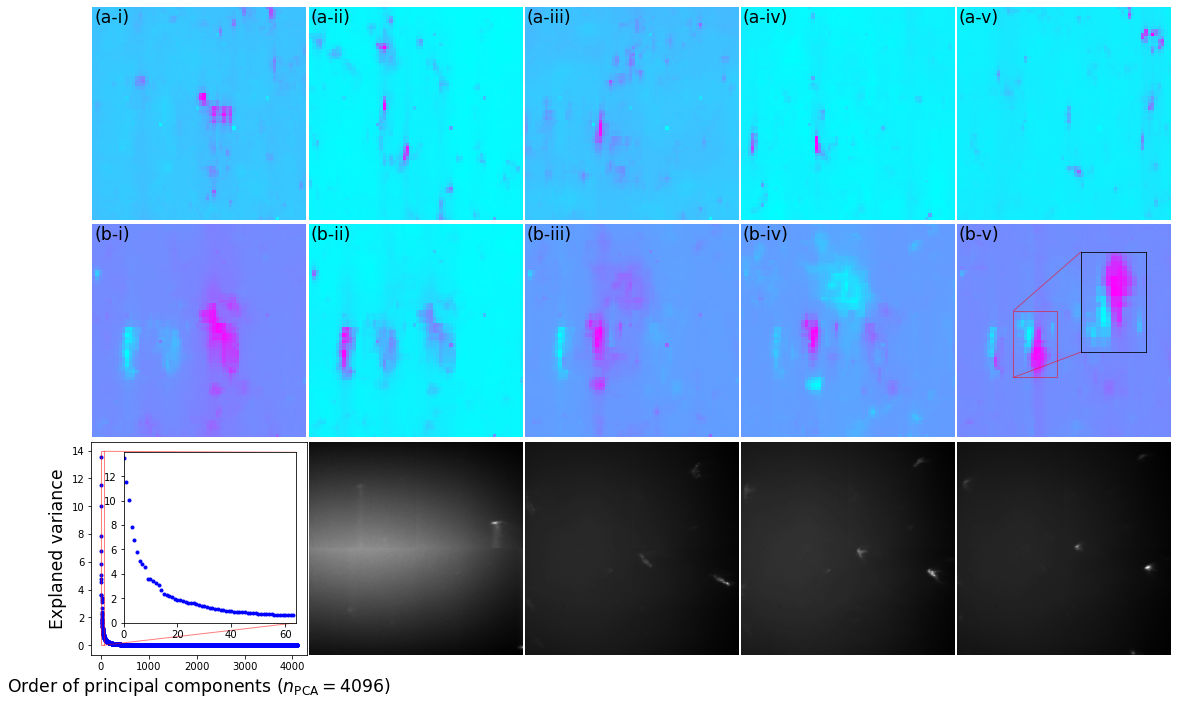

In [65]:
#pca_features=pca.fit_transform(np.delete(FA_spatial,id_zero,0))#components_
#pca_features=np.insert(pca_features,id_zero,np.zeros(n_pca),0)

from matplotlib.patches import ConnectionPatch
from matplotlib.path import Path

X=X.reshape((64,64,512,512))

rom=['i','ii','iii','iv','v','vi','vii','viii']

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=3, ncols=5, left=0, right=1.25,bottom=0,top=0.75, wspace=0.002,hspace=0.02)

for i in range(1):
    for j in range(5):
        ax = fig.add_subplot(gs[i,j])
        ax.axis('off')
        ax.imshow(FA_spatial[:,j].reshape((64,64)),cmap='cool')#cmap='PRGn')
        ax.text(0,0,"(a-%s)"%(rom[j]),size='xx-large',verticalalignment='top',color='black')

###########################################
for i in range(1,2):
    for j in range(5):
        ax = fig.add_subplot(gs[i,j])
        ax.axis('off')
        ax.imshow(pca_features[:,j].reshape((64,64)),cmap='cool')
        ax.text(0,0,"(b-%s)"%(rom[j]),size='xx-large',verticalalignment='top',color='black')
#ax14=fig.add_subplot(gs[1,4])
#ax14.axis('off')
#ax14.imshow(pca_features[:,j].reshape((64,64)),cmap='RdBu')
#ax14.text(0,0,"(b-%s)"%(rom[j]),size='xx-large',verticalalignment='top',color='black')
axins = ax.inset_axes([0.5, 0.4, 0.47, 0.47])
#axins.imshow(np.flipud(pca_features[:,4].reshape((64,64)) ),cmap='cool',origin='lower')

axins.imshow(pca_features[:,4].reshape((64,64))[:,:] ,cmap='cool',origin='upper')
# sub region of the original image
x1, x2, y1, y2 = 16.5,29.5,25.5,45.5
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(left=False,right=False,top=False,bottom=False)

axins.set_xticklabels('')
axins.set_yticklabels('')

xmin,xmax=axins.get_xlim()
ymin,ymax=axins.get_ylim()

axins.set_aspect(3./5.)

ax.indicate_inset_zoom(axins,edgecolor='red')


###########################################

ax=fig.add_subplot(gs[2,0])
ax.plot(np.arange(n_pca), pca.explained_variance_,'b.')
ax.set_xlabel("Order of principal components ($n_{\mathrm{PCA}}=%i$)"%n_pca,size='xx-large')
ax.set_ylabel("Explaned variance",size='xx-large')

axins = ax.inset_axes([0.15, 0.15, 0.8, 0.8])
axins.plot(np.arange(64), pca.explained_variance_[:64],'b.')
# sub region of the original image
x1, x2, y1, y2 = 0,64,0,13.95
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#axins.tick_params(left=False,right=False,top=False,bottom=False)

#axins.set_xticklabels('')
#axins.set_yticklabels('')

ax.indicate_inset_zoom(axins,edgecolor='red')

ax=fig.add_subplot(gs[2,1])
ax.axis('off')

#filename="140_S015_C001.TIFF"
#dirname="../XRD_images/2nd_saving/"
#im=IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)[0]
#im=(im-im.mean())/im.std()
ax.imshow(X[36,42].reshape((512,512)),cmap='gray')

#con = ConnectionPatch(xyA=(35,12), xyB=(256,256), coordsA="data", coordsB="data",
#                       axesA=ax, axesB=ax14,
#                       arrowstyle="->", shrinkB=5, color='r')
#ax.add_artist(con)
#ax14.add_artist(con)
#gs[1,4].add_artist(con)

ax=fig.add_subplot(gs[2,2])
ax.axis('off')

#filename="140_S038_C023.TIFF"
#dirname="../XRD_images/2nd_saving/"
#im=IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)[0]
#im=(im-im.mean())/im.std()
ax.imshow(X[38,23].reshape((512,512)),cmap='gray')

ax=fig.add_subplot(gs[2,3])
ax.axis('off')

#filename="140_S038_C023.TIFF"
#dirname="../XRD_images/2nd_saving/"
#im=IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)[0]
#im=(im-im.mean())/im.std()
ax.imshow(X[35,22].reshape((512,512)),cmap='gray')

ax=fig.add_subplot(gs[2,4])
ax.axis('off')

#filename="140_S038_C023.TIFF"
#dirname="../XRD_images/2nd_saving/"
#im=IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)[0]
#im=(im-im.mean())/im.std()
ax.imshow(X[33,21].reshape((512,512)),cmap='gray')



plt.savefig('fig4.tif',format='tif',bbox_inches ='tight')


'\nax = fig.add_subplot(gs[0,3])\n#ax.axis(\'off\')\n\nfilename="140_S015_C001.TIFF"\ndirname="../XRD_images/2nd_saving/"\nim=IOimage.readCCDimage(filename=filename,CCDLabel=\'TIFF Format\',dirname=dirname)[0]\nax.imshow(im,cmap=\'gray\')\n'

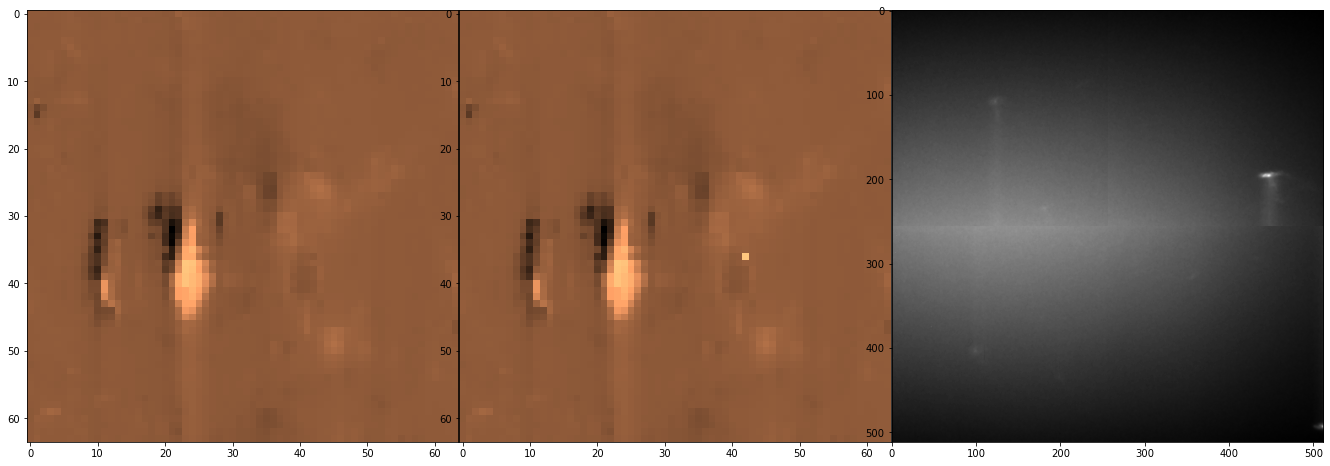

In [28]:
#pca_features=pca.fit_transform(np.delete(FA_spatial,id_zero,0))#components_
#pca_features=np.insert(pca_features,id_zero,np.zeros(n_pca),0)

#pca_features=pca.fit_transform(FA_spatial)#components_
pca_features_=pca_features.copy()
fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=1, ncols=3, left=0, right=1.5,bottom=0,top=0.5, wspace=0.002,hspace=0.02)

i,j=36,42

ax = fig.add_subplot(gs[0,0])
#ax.axis('off')
im=pca_features[:,4].reshape((64,64))
ax.imshow(im,cmap='copper')

ax = fig.add_subplot(gs[0,1])
#ax.axis('off')
im=pca_features_[:,4].reshape((64,64))
im[i,j]=im.max()
ax.imshow(im,cmap='copper')

ax = fig.add_subplot(gs[0,2])
#ax.axis('off')

#filename="140_S038_C023.TIFF"
#dirname="../XRD_images/2nd_saving/"
im=X[i,j].reshape((512,512))#IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)[0]
ax.imshow(im,cmap='gray')
"""
ax = fig.add_subplot(gs[0,3])
#ax.axis('off')

filename="140_S015_C001.TIFF"
dirname="../XRD_images/2nd_saving/"
im=IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)[0]
ax.imshow(im,cmap='gray')
"""

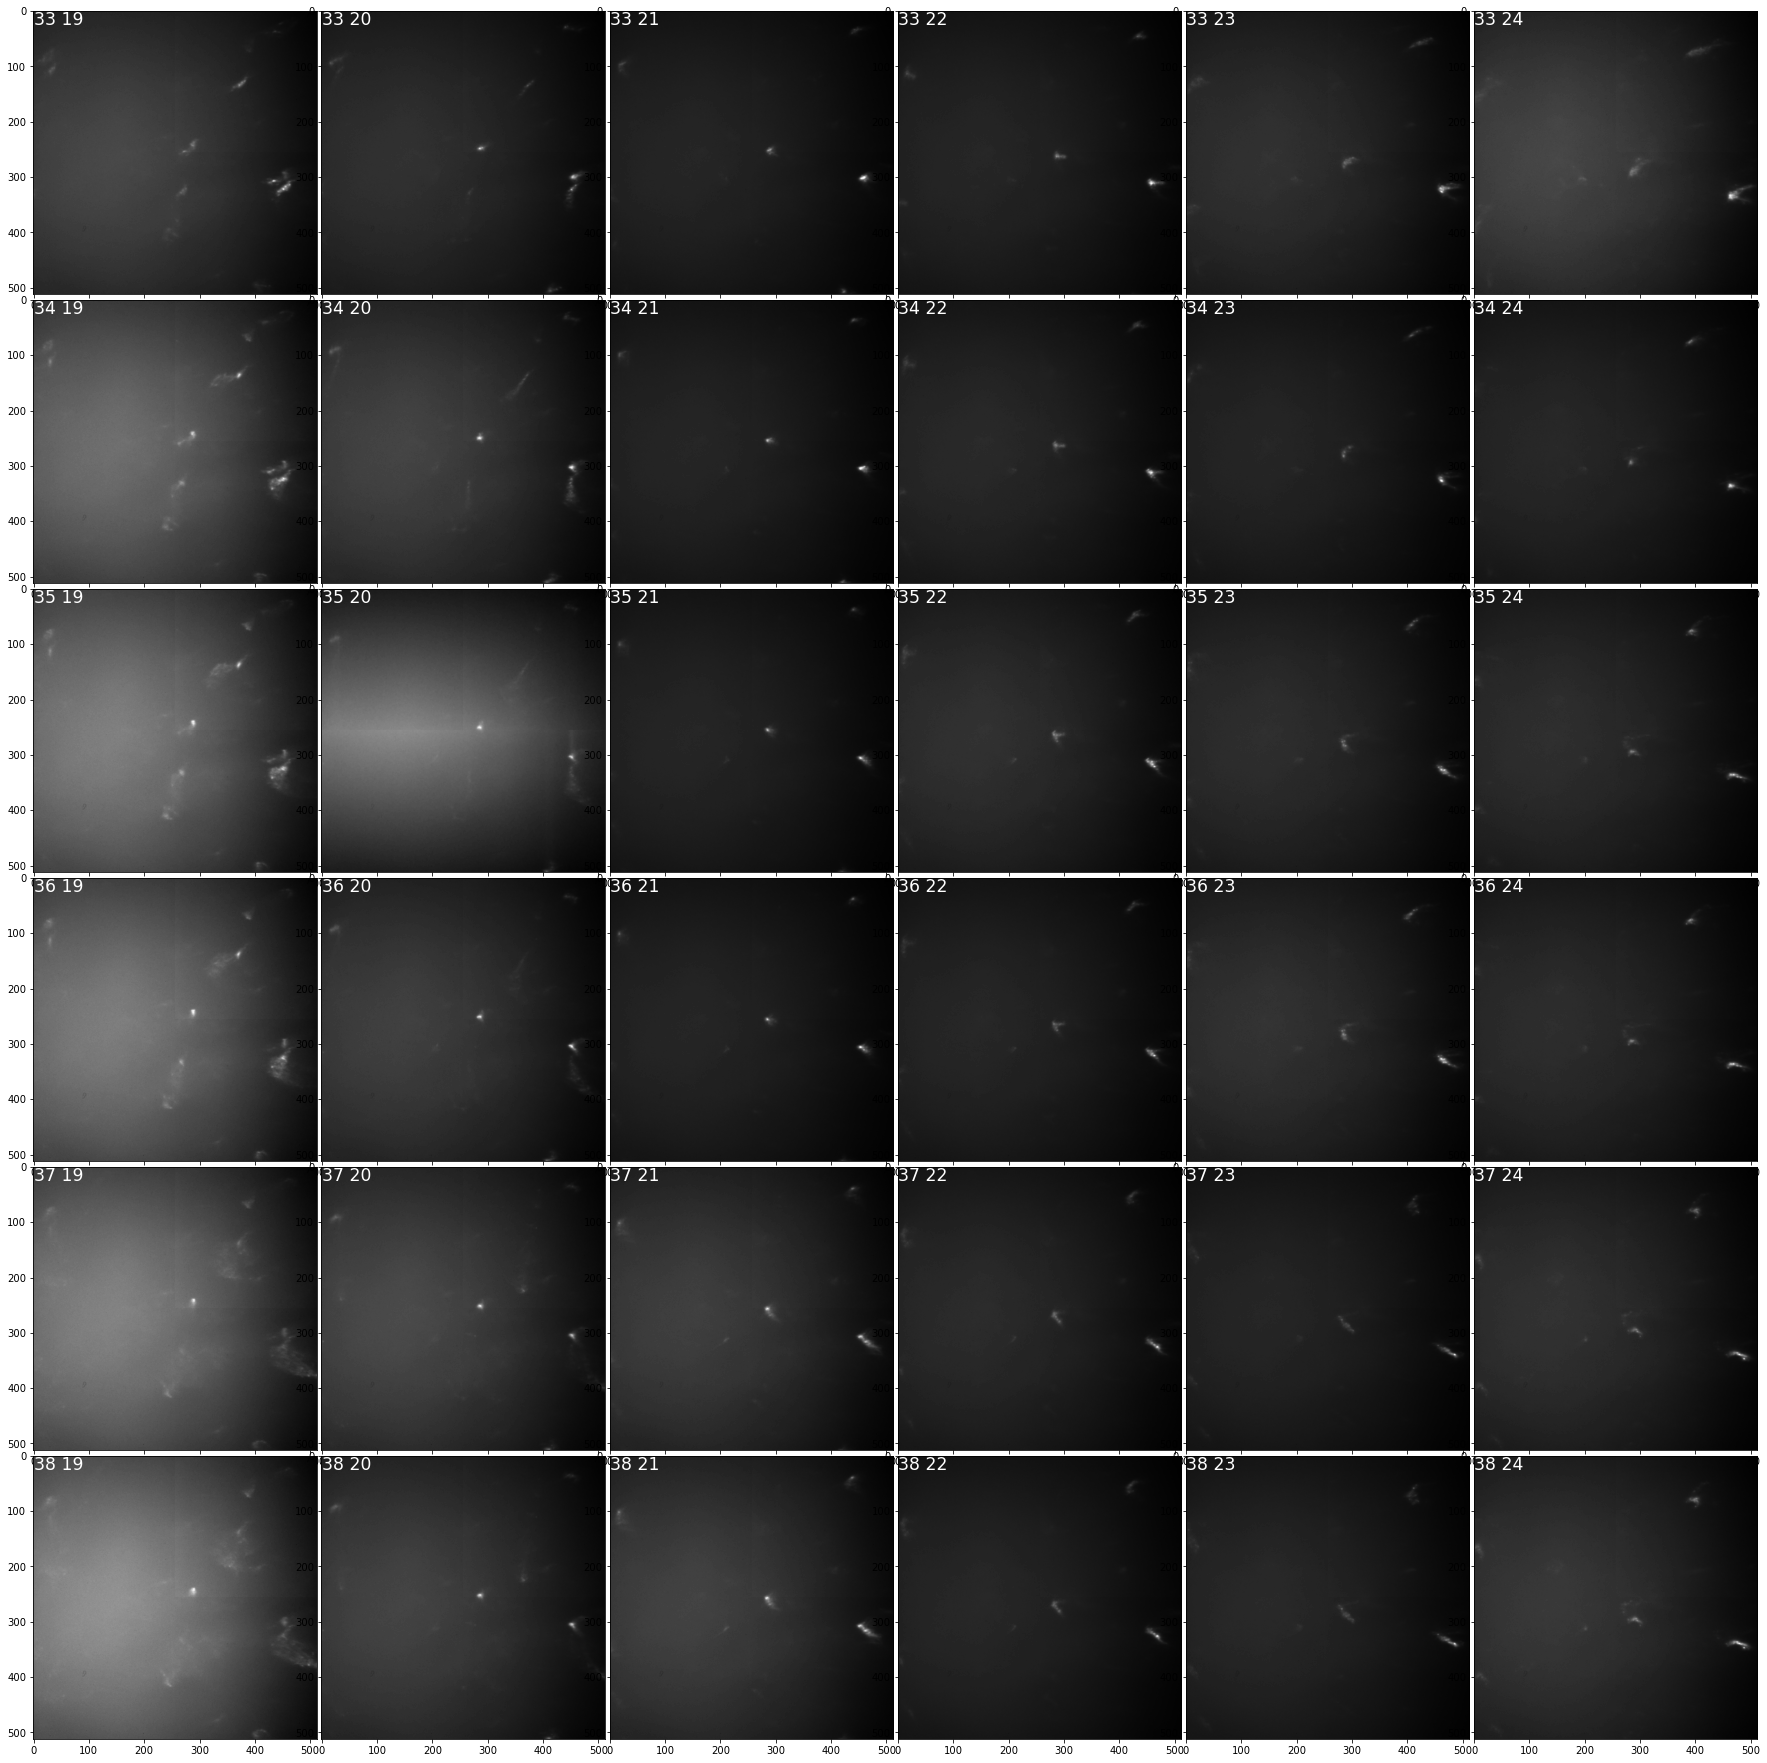

In [30]:
s_range=range(33,39)
c_range=range(19,25)

fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=6, ncols=6, left=0, right=2,bottom=0,top=2, wspace=0.002,hspace=0.02)

for i in range(6):
    for j in range(6):
        ax = fig.add_subplot(gs[i,j])
        im=X[s_range[i],c_range[j]].reshape((512,512))
        ax.text(0,0,"%i %i"%(s_range[i],c_range[j]),size='xx-large',verticalalignment='top',color='white')
        ax.imshow(im,cmap='gray')

'\nax = fig.add_subplot(gs[0,3])\n#ax.axis(\'off\')\n\nfilename="140_S015_C001.TIFF"\ndirname="../XRD_images/2nd_saving/"\nim=IOimage.readCCDimage(filename=filename,CCDLabel=\'TIFF Format\',dirname=dirname)[0]\nax.imshow(im,cmap=\'gray\')\n'

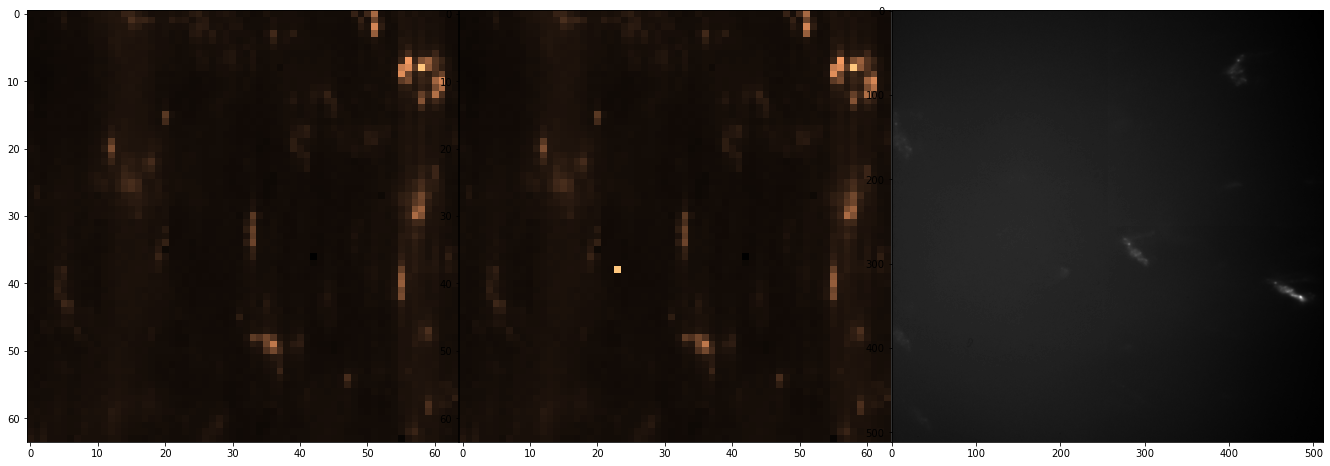

In [8]:
#pca_features=pca.fit_transform(np.delete(FA_spatial,id_zero,0))#components_
#pca_features=np.insert(pca_features,id_zero,np.zeros(n_pca),0)

#pca_features=pca.fit_transform(FA_spatial)#components_
FA_spatial_=FA_spatial.copy()
fig = plt.figure(constrained_layout=False,figsize=(12,12))
gs = fig.add_gridspec(nrows=1, ncols=3, left=0, right=1.5,bottom=0,top=0.5, wspace=0.002,hspace=0.02)

i,j=38,23

ax = fig.add_subplot(gs[0,0])
#ax.axis('off')
im=FA_spatial[:,4].reshape((64,64))
ax.imshow(im,cmap='copper')

ax = fig.add_subplot(gs[0,1])
#ax.axis('off')
im=FA_spatial_[:,4].reshape((64,64))
im[i,j]=im.max()
ax.imshow(im,cmap='copper')

ax = fig.add_subplot(gs[0,2])
#ax.axis('off')

#filename="140_S038_C023.TIFF"
#dirname="../XRD_images/2nd_saving/"
im=X[i,j].reshape((512,512))#IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)[0]
ax.imshow(im,cmap='gray')
"""
ax = fig.add_subplot(gs[0,3])
#ax.axis('off')

filename="140_S015_C001.TIFF"
dirname="../XRD_images/2nd_saving/"
im=IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)[0]
ax.imshow(im,cmap='gray')
"""